<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TEIC_Licao1_ClassificacaoPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 1 - Perceptron - Conjuntos linearmente separáveis

Nesta lição, vamos ver a aplicação das redes neurais de uma camada em um problema linearmente separável.  

Temos duas classes, com coordenadas bi-dimensionais.


## Carregando as bibliotecas

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Lendo os dados em csv

In [2]:
from sklearn.datasets import make_blobs

data, label = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)


## A dispersão dos dados (treinamento e teste)



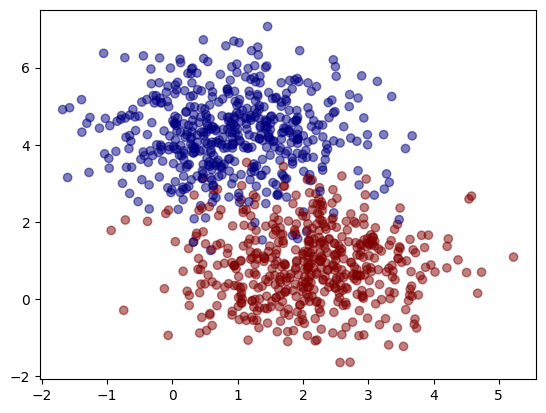

In [3]:
plt.scatter(data[:,0], data[:,1], c=label , alpha=0.5, cmap='jet')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=0)

## Primeira tentativa: Rede neural com apenas um neurônio

In [11]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, activation=tf.nn.sigmoid, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

model.summary()

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7928 - loss: 0.1504   
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.1220 
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9100 - loss: 0.1051 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8989 - loss: 0.1060 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9218 - loss: 0.0931 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9223 - loss: 0.0955 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9329 - loss: 0.0828 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9297 - loss: 0.0854 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9221 - loss: 0.0908 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9186 - loss: 0.0888
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9238 - loss: 0.0809 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Dispersão da predição para o conjunto de teste

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


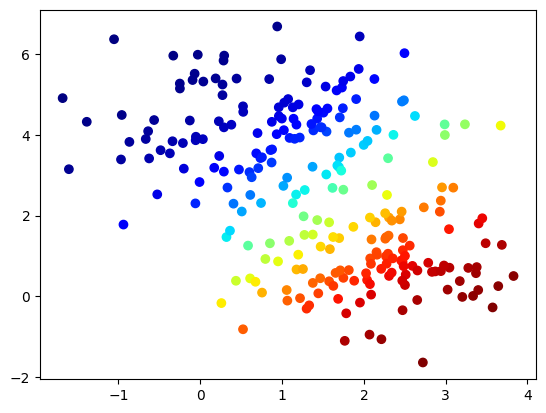

In [12]:
y_predict = model.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=y_predict , cmap='jet')
plt.show()

## Superfície gerada pela rede (predição)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step


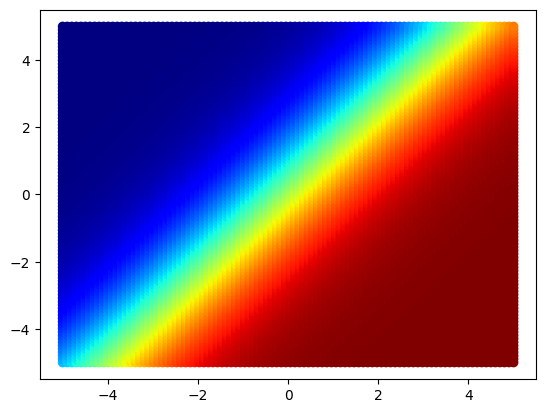

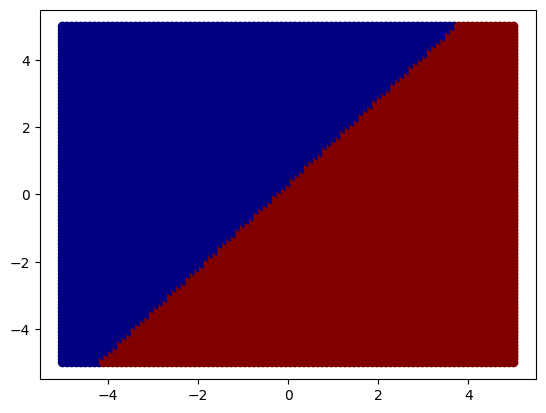

In [13]:
nx = 100
ny = 100
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
xv,yv = np.meshgrid(x, y, sparse=False, indexing='ij')
test_grid_x =  xv.flatten()
test_grid_y =  yv.flatten()

grid_list = np.append(test_grid_x, test_grid_y, axis=0)

test_grid = np.reshape(grid_list, (2, -1))

test_predict4 = model.predict(test_grid.T)

plt.scatter(test_grid[0,:], test_grid[1,:], c=test_predict4, cmap='jet')

plt.show()

plt.scatter(test_grid[0,:], test_grid[1,:], c=(test_predict4>0.5), cmap='jet')

plt.show()

## Acurácia de validação

In [14]:
model2 = tf.keras.Sequential([keras.layers.Dense(units=1, activation=tf.nn.sigmoid, input_shape=[2])])
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))



model2.summary()

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1503 - loss: 0.6495 - val_accuracy: 0.1600 - val_loss: 0.6325
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1341 - loss: 0.6569 - val_accuracy: 0.1720 - val_loss: 0.6218
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1676 - loss: 0.6332 - val_accuracy: 0.1840 - val_loss: 0.6106
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1862 - loss: 0.6207 - val_accuracy: 0.2000 - val_loss: 0.5993
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2066 - loss: 0.6131 - val_accuracy: 0.2120 - val_loss: 0.5878
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2306 - loss: 0.5895 - val_accuracy: 0.2280 - val_loss: 0.5763
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2740 - loss: 0.5728 - val_accuracy: 0.2520 - val_loss: 0.5647
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2607 - loss: 0.5818 - val_accuracy: 0.2800 - val_loss

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Evolução do treinamento

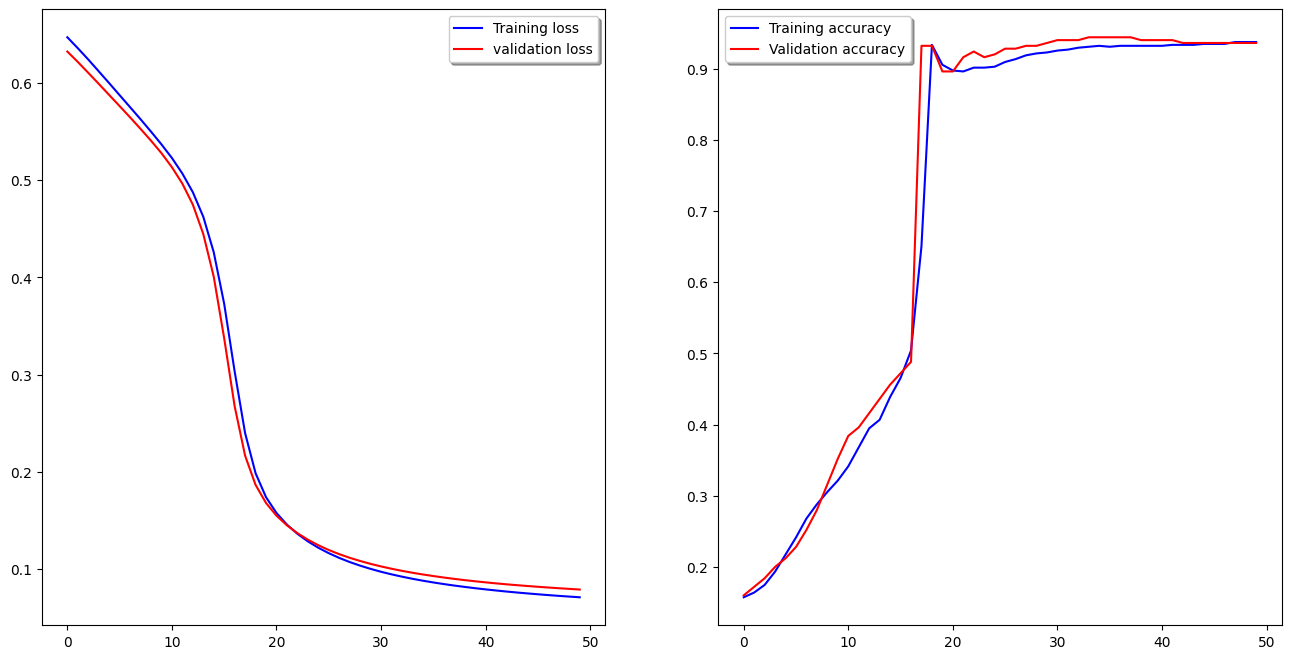

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

